In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/waze_dataset.csv')

In [ ]:
data

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,14994,retained,60,55,207.875622,140,317,0,2890.496901,2186.155708,25,17,iPhone
14995,14995,retained,42,35,187.670313,2505,15,10,4062.575194,1208.583193,25,20,Android
14996,14996,retained,273,219,422.017241,1873,17,0,3097.825028,1031.278706,18,17,iPhone
14997,14997,churned,149,120,180.524184,3150,45,0,4051.758549,254.187763,6,6,iPhone


In [ ]:
data.label.value_counts()

,count
label,
retained,11763
churned,2536


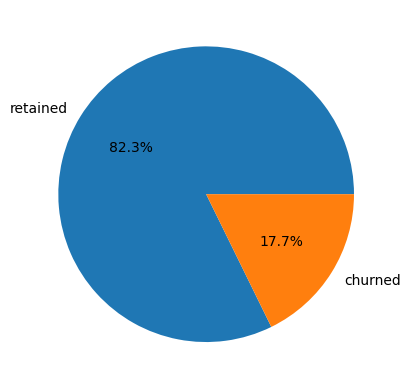

In [ ]:
plt.pie(data.label.value_counts(), labels=data.label.value_counts().index, autopct='%1.1f%%')
plt.show()

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.drop('ID', axis=1, inplace=True)

In [ ]:
data.columns

Index(['label', 'sessions', 'drives', 'total_sessions',
       'n_days_after_onboarding', 'total_navigations_fav1',
       'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives',
       'activity_days', 'driving_days', 'device'],
      dtype='object')

<Axes: >

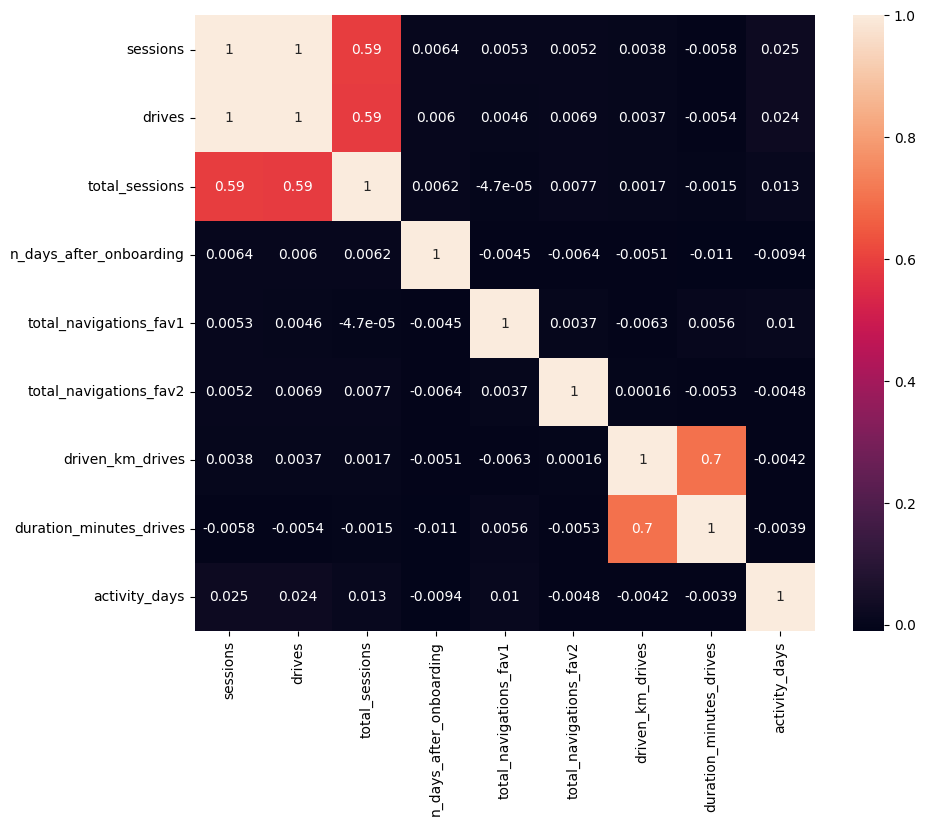

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.iloc[:, 1:10].corr(), annot=True)

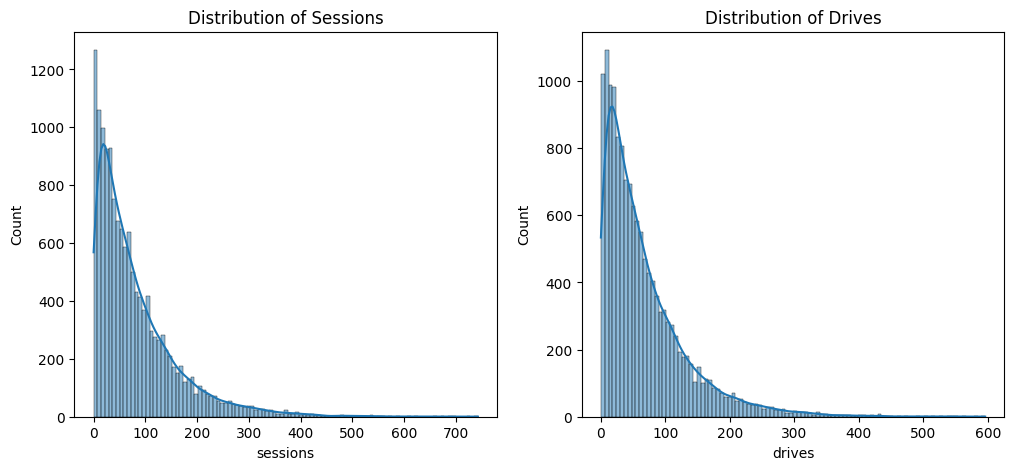

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['sessions'], kde=True)
plt.title('Distribution of Sessions')
plt.subplot(1, 2, 2)
sns.histplot(data['drives'], kde=True)
plt.title('Distribution of Drives')
plt.show()



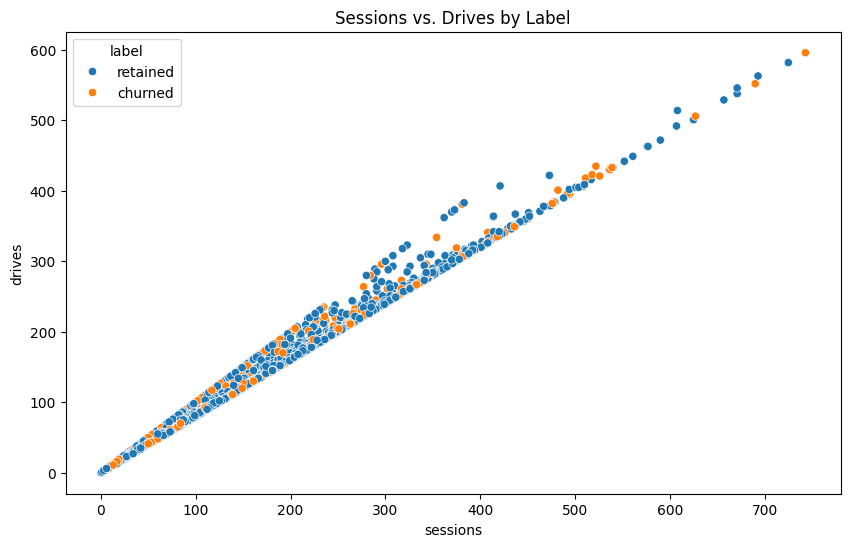

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sessions', y='drives', hue='label', data=data)
plt.title('Sessions vs. Drives by Label')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


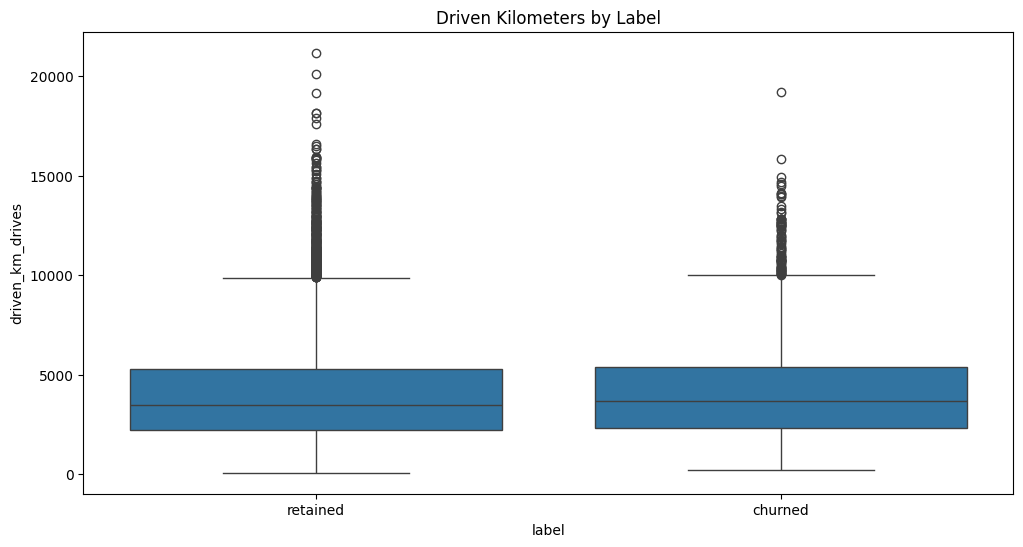

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


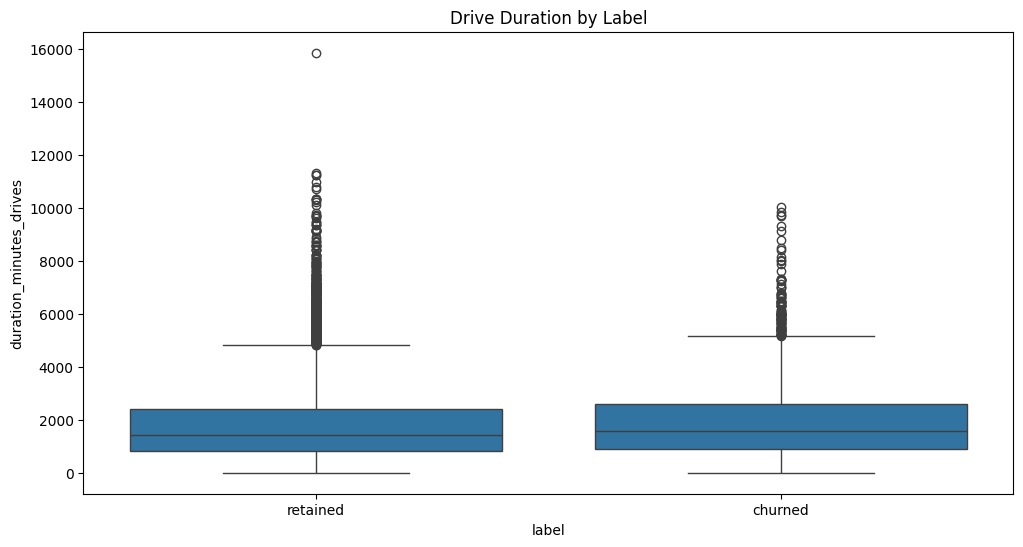

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='driven_km_drives', data=data)
plt.title('Driven Kilometers by Label')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='duration_minutes_drives', data=data)
plt.title('Drive Duration by Label')
plt.show()

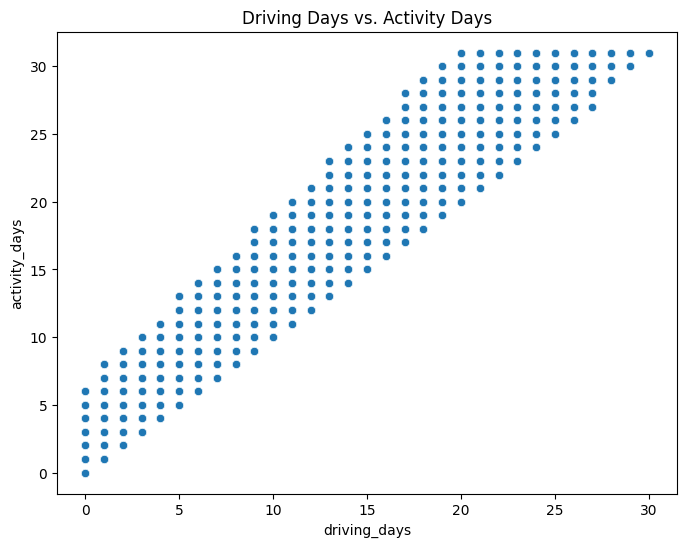

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='driving_days', y='activity_days', data=data)
plt.title('Driving Days vs. Activity Days')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

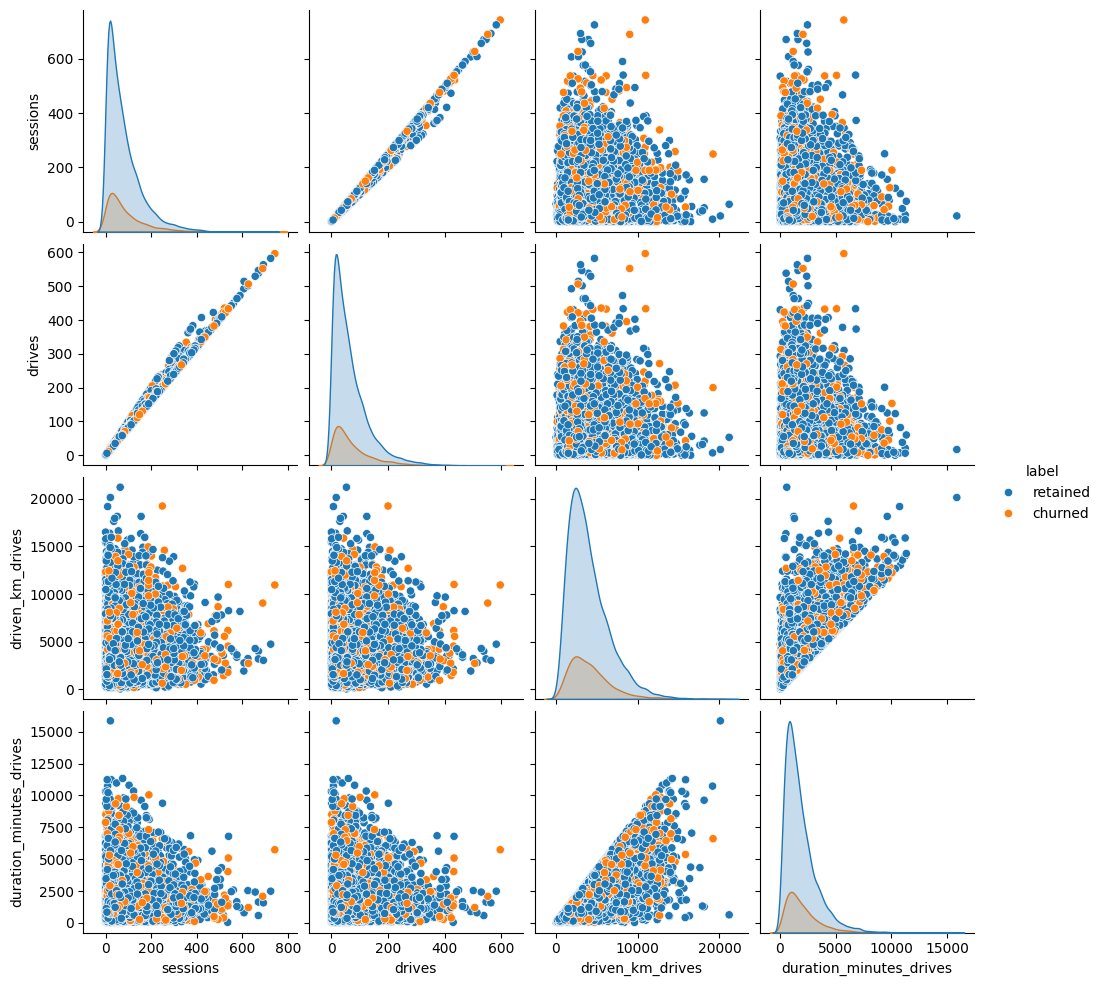

In [ ]:
sns.pairplot(data[['sessions', 'drives', 'driven_km_drives', 'duration_minutes_drives', 'label']], hue='label')
plt.show()


In [ ]:
label_map = {'retained': 1, 'churned': 0}
data['label'] = data['label'].map(label_map)

label_map = {'iPhone': 1, 'Android': 0}
data['device'] = data['device'].map(label_map)

In [ ]:
data

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,1,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,0
1,1,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,1
2,1,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,0
3,1,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,1
4,1,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14994,1,60,55,207.875622,140,317,0,2890.496901,2186.155708,25,17,1
14995,1,42,35,187.670313,2505,15,10,4062.575194,1208.583193,25,20,0
14996,1,273,219,422.017241,1873,17,0,3097.825028,1031.278706,18,17,1
14997,0,149,120,180.524184,3150,45,0,4051.758549,254.187763,6,6,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14299 entries, 0 to 14998
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    14299 non-null  int64  
 1   sessions                 14299 non-null  int64  
 2   drives                   14299 non-null  int64  
 3   total_sessions           14299 non-null  float64
 4   n_days_after_onboarding  14299 non-null  int64  
 5   total_navigations_fav1   14299 non-null  int64  
 6   total_navigations_fav2   14299 non-null  int64  
 7   driven_km_drives         14299 non-null  float64
 8   duration_minutes_drives  14299 non-null  float64
 9   activity_days            14299 non-null  int64  
 10  driving_days             14299 non-null  int64  
 11  device                   14299 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 1.4 MB


In [ ]:
data.describe()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,0.822645,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530,0.645150
std,0.381982,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835,0.478485
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000
25%,1.000000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,0.000000
50%,1.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,1.000000
75%,1.000000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,1.000000
max,1.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000,1.000000


In [ ]:
X_scaled

array([[0.38088829, 0.37919463, 0.24386847, ..., 0.90322581, 0.63333333,
        0.        ],
       [0.17900404, 0.1795302 , 0.26866283, ..., 0.41935484, 0.36666667,
        1.        ],
       [0.15343203, 0.15939597, 0.11127468, ..., 0.4516129 , 0.26666667,
        0.        ],
       ...,
       [0.36742934, 0.36744966, 0.34689127, ..., 0.58064516, 0.56666667,
        1.        ],
       [0.20053836, 0.20134228, 0.14828429, ..., 0.19354839, 0.2       ,
        1.        ],
       [0.09825034, 0.09731544, 0.29047585, ..., 0.4516129 , 0.43333333,
        1.        ]])

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X = data.drop('label', axis=1)
y = data['label']

In [ ]:
X['sessions'] = np.log1p(X['sessions'])
X['drives'] = np.log1p(X['drives'])

<Axes: xlabel='sessions', ylabel='Count'>

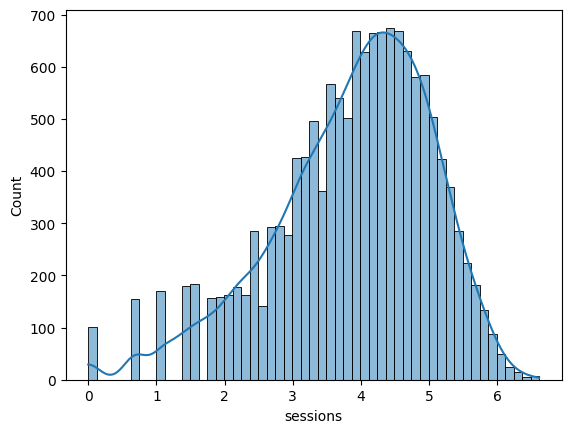

In [ ]:
sns.histplot(X['sessions'], kde=True)

<Axes: xlabel='drives', ylabel='Count'>

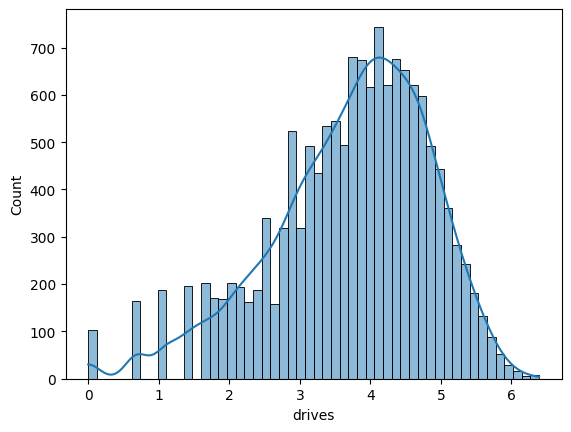

In [ ]:
sns.histplot(X['drives'], kde=True)

In [ ]:
data.loc[:, ["drives", "sessions", "label"]].corr()

,drives,sessions,label
drives,1.000000,0.996843,-0.038548
sessions,0.996843,1.000000,-0.038045
label,-0.038548,-0.038045,1.000000


In [ ]:
X.drop("sessions", axis=1, inplace=True)

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=2000, class_weight={0:0.7, 1:0.3}, penalty="l2")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.784965034965035
              precision    recall  f1-score   support

           0       0.42      0.47      0.44       523
           1       0.88      0.86      0.87      2337

    accuracy                           0.78      2860
   macro avg       0.65      0.66      0.66      2860
weighted avg       0.79      0.78      0.79      2860



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = MinMaxScaler()
X_train_rescaled = scaler.fit_transform(X_train)
X_test_rescaled = scaler.transform(X_test)


In [ ]:
svc = SVC(class_weight='balanced')

param_grid = {'C': [1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
grid = GridSearchCV(svc, param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train_rescaled, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   4.1s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   4.2s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   5.1s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   4.0s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   4.1s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   6.5s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   5.1s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   6.1s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   6.2s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   5.3s
[CV] END .....................C=1, gamma=auto, kernel=linear; total time=   5.4s
[CV] END .....................C=1, gamma=auto, k

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [ ]:
y_pred = grid.predict(X_test_rescaled)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 359  164]
 [ 728 1609]]

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.69      0.45       523
           1       0.91      0.69      0.78      2337

    accuracy                           0.69      2860
   macro avg       0.62      0.69      0.61      2860
weighted avg       0.80      0.69      0.72      2860



In [ ]:
grid.best_params_

{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

In [ ]:
best_model = SVC(class_weight='balanced', **grid.best_params_)

In [ ]:
best_model.fit(X_train, y_train)

SVC(C=10, class_weight='balanced', gamma='auto')